## 1. Collecting BRIC Data

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_palette('summer')
plt.style.use('seaborn')

In [2]:
nsei = pd.read_csv('data/BRICS EQUITY INDICES/NSEI.csv', header = 0, index_col = 0, parse_dates = True)['Adj Close']
bvsp = pd.read_csv('data/BRICS EQUITY INDICES/BVSP.csv', header = 0, index_col = 0, parse_dates = True)['Adj Close']
moex = pd.read_csv('data/BRICS EQUITY INDICES/MOEX.csv', header = 0, index_col = 0, parse_dates = True)['Adj Close']
sse = pd.read_csv('data/BRICS EQUITY INDICES/SSE.csv', header = 0, index_col = 0, parse_dates = True)['Adj Close']

# creating a portfolio of stock returns from the major indices in the BRIC stock markets
dat = pd.DataFrame(
    {
        'BRAZIL (BVSP)':bvsp,
        'RUSSIA (MOEX)':moex,
        'INDIA (NIFTY)':nsei,
        'CHINA (SSE)':sse
    }
)

dat = dat.dropna()

In [3]:
dat.describe()

,BRAZIL (BVSP),RUSSIA (MOEX),INDIA (NIFTY),CHINA (SSE)
count,1742.000000,1742.000000,1742.000000,1742.000000
mean,71224.398393,78.015811,9272.196132,2950.558053
std,22228.203337,32.894386,2131.697602,547.594220
min,37645.000000,26.796057,5285.000000,1950.011963
25%,52377.250000,45.863086,7860.150146,2607.305054
50%,63706.500000,82.384152,8898.649903,3005.104004
75%,88491.000000,94.174501,10856.400146,3274.184021
max,125077.000000,177.470001,15245.599609,5131.880859


In [4]:
# create a return dataframe from price data considering percentage change as returns
returns = dat.pct_change().dropna()

In [5]:
returns.head()

,BRAZIL (BVSP),RUSSIA (MOEX),INDIA (NIFTY),CHINA (SSE)
Date,,,,
2013-02-19,-0.005207,-0.000357,0.007036,-0.015958
2013-02-20,-0.019821,-0.010714,0.000564,0.005986
2013-02-21,-0.000409,-0.012635,-0.015278,-0.029713
2013-02-22,0.009652,-0.003656,-0.000333,-0.005068
2013-02-25,-0.001393,0.004587,0.000761,0.005036


In [6]:
returns.describe()

,BRAZIL (BVSP),RUSSIA (MOEX),INDIA (NIFTY),CHINA (SSE)
count,1741.000000,1741.000000,1741.000000,1741.000000
mean,0.000556,0.001091,0.000590,0.000312
std,0.017806,0.019276,0.011993,0.015051
min,-0.147797,-0.091292,-0.129805,-0.102663
25%,-0.008352,-0.009205,-0.004875,-0.005523
50%,0.000560,0.000000,0.000833,0.000547
75%,0.009698,0.011651,0.006542,0.006618
max,0.139082,0.132525,0.087632,0.105672


In [7]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.stattools import adfuller

In [8]:
def stationarity(df):
    import statsmodels.api as sm
    acf_p=acf(df, nlags=10)
    pacf_p=pacf(df, nlags=10)
    f, ax = plt.subplots(2, 2, sharey=True, figsize=(17,6))
    ax[0,0].plot(df)
    ax[0,0].set_title('Sharing Y axis')
    
    ax[0,1].plot(acf_p)
    ax[0,1].axhline(y=0, linestyle='--', color='gray')
    ax[0,1].axhline(y=1.96/(np.sqrt(len(df))), linestyle='--', color='gray')
    ax[0,1].axhline(y=-1.96/(np.sqrt(len(df))), linestyle='--', color='gray')            
    ax[0,1].axhline(y=0, linestyle='--', color='gray')
    ax[0,1].set_title(str('ACF plot'))
    
    ax[1,0].plot(pacf_p)
    ax[1,0].axhline(y=0, linestyle='--', color='gray')
    ax[1,0].axhline(y=1.96/(np.sqrt(len(df))), linestyle='--', color='gray')
    ax[1,0].axhline(y=-1.96/(np.sqrt(len(df))), linestyle='--', color='gray')            
    ax[1,0].axhline(y=0, linestyle='--', color='gray')
    ax[1,0].set_title(str('PACF plot'))
    

    sm.qqplot(df, line='s', ax=ax[1,1])
    ax[1,1].set_title(str('QQ plot'))
    
    rs=adfuller(df)
    print (rs)
    plt.savefig(f'images/{i}.png')
    plt.show()

C:\Users\unnik\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning
(-10.006609533427508, 1.8244302216319545e-17, 17, 1723, {'1%': -3.434150968697906, '5%': -2.8632189151648864, '10%': -2.567663807484617}, -8950.742525785736)


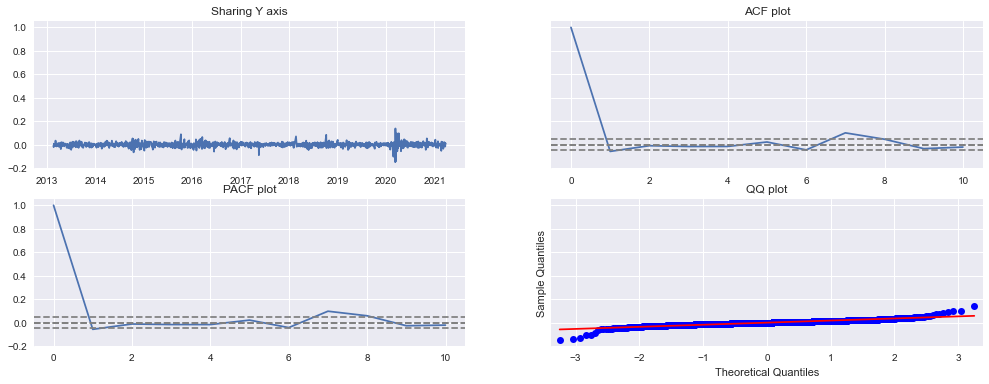

C:\Users\unnik\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning
(-16.13713830145987, 4.718055662738879e-29, 5, 1735, {'1%': -3.4341246405277706, '5%': -2.863207293168388, '10%': -2.5676576190318}, -8669.62860777129)


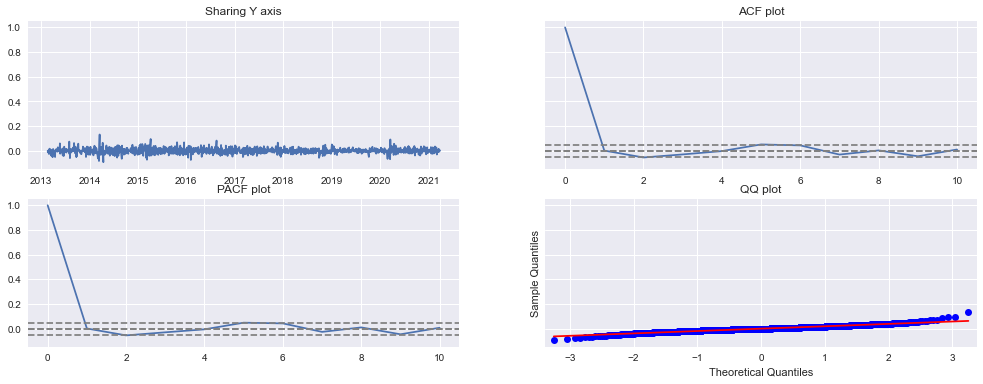

C:\Users\unnik\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning
(-8.764307697130945, 2.622731075941021e-14, 23, 1717, {'1%': -3.4341642709947586, '5%': -2.8632247871349015, '10%': -2.567666934183466}, -10329.956782284531)


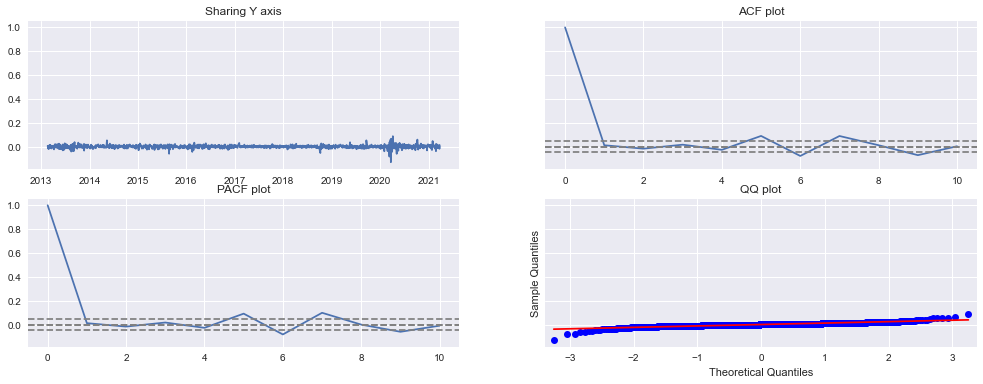

C:\Users\unnik\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning
(-13.732108560871085, 1.1350392572107583e-25, 7, 1733, {'1%': -3.434129003198009, '5%': -2.863209218981072, '10%': -2.5676586444827656}, -9531.015839149717)


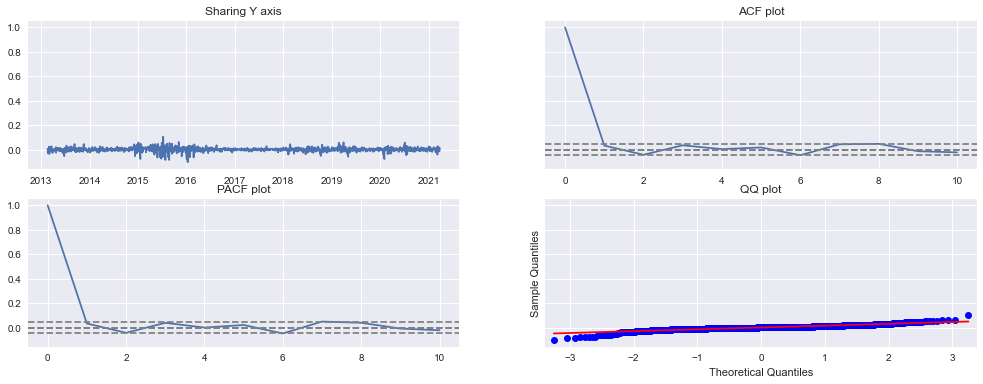

In [9]:
for i in returns.columns:
    stationarity(returns[i])

### I. Estimate an AR(1)-EGARCH(1,1) model for each asset 𝑖, and obtain parameter estimates, conditional sigmas and residuals

{Xt} is called an autoregressive process of order k with an GARCH noise of order p, q, in short

AR(k)-EGARCH(p,q) process, 

if for t = 0, ±1, ±, 2, . . . :

>$$Xt = ϕ_1X_{t−1} + · · · + ϕ_kX_{t−k} + ε_t$$

>$$ε_t = σ_tv_t$$

where $v_t$ is a strong white noise (iid (0,1)), and $σ_t$ satisfies the recurrence equation:

>$$ ln(σ_t^2) = \alpha_0 + \alpha_1 g({v_{t-1}}) + . . . . \alpha_p g({v_{t-p}}) + \beta_1 ln({\sigma_{t-1}} ^2) + . . . . \beta_q ln({\sigma_{t-q}} ^2)$$

where 

>$$g(v_t) = \theta v_t + \delta (|v_t| - E|v_t|)$$

Here, we are following the AR(1)-EGARCH(1,1)

Hence, our process is:

>$$Xt = ϕ_1X_{t−1} + ε_t$$

>$$ε_t = σ_tv_t$$

>$$ ln(σ_t^2) = \alpha_0 + \alpha_1 g({v_{t-1}}) + \beta_1 ln({\sigma_{t-1}} ^2) $$

>$$g(v_t) = \theta v_t + \delta (|v_t| - E|v_t|)$$


In [10]:
import armagarch as ag


# define mean, vol and distribution
meanMdl = ag.ARMA(order = {'AR':1,'MA':0})
volMdl = ag.garch(order = {'p':1,'q':1}) # need doubts clarified regarding E-GARCH
distMdl = ag.normalDist()

# create a model
model = ag.empModel(returns['Food'].to_frame(), meanMdl, volMdl, distMdl)

# fit model
model.fit()

# get the conditional mean
Ey = model.Ey

# get conditional variance
ht = model.ht
cvol = np.sqrt(ht)

# get standardized residuals
stres = model.stres

# make a prediction of mean and variance over next 3 days.
pred = model.predict(nsteps = 1)


KeyError: 'Food'